<h1><strong><u>Week 2</u><strong></h1>

In [2]:
from pallette import pallette   # this is just a 'easy-on-the-eyes' color pallette i made

import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt(fname='popus.txt', dtype=int, delimiter='\t')   # Show me the goods

<div align='left'>
  <h2>
    <strong><u>Plot using OOP:</u></strong>
  </h2>
</div>
<div>
  <h4>
    <ul style="text-align: left; display: inline-block;">
      <li><code>Axies</code> should have <code>labels</code></li>
      <li><code>Ticks</code> scaled well</li>
      <li>Non-default colors & line sizes</li>
    </ul>
  </h4>
</div>

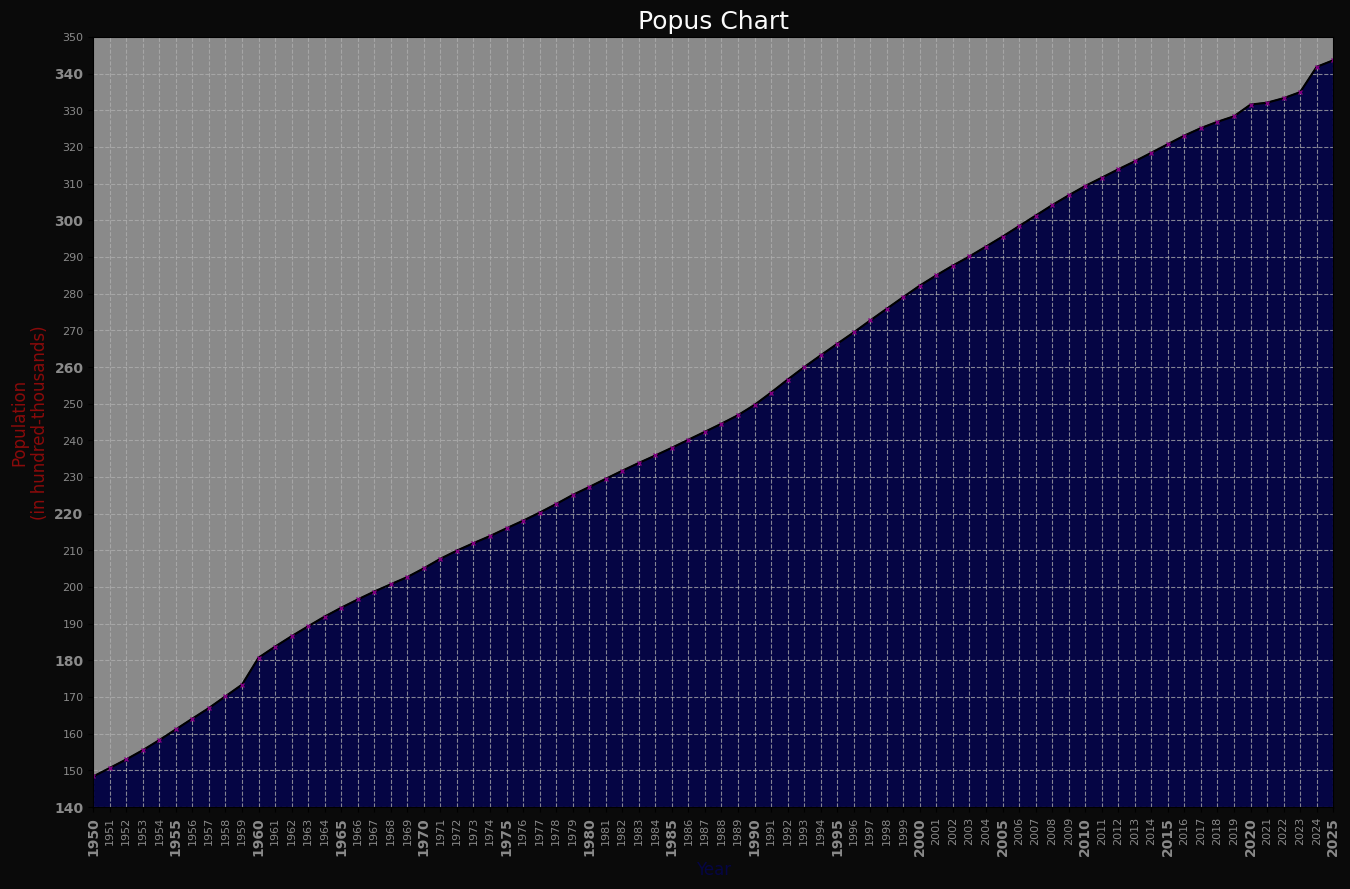

In [9]:
years = [item[0] for item in data]      # extracts years
values = [item[1] for item in data]     # extracts population

fig, ax = plt.subplots(figsize=(16,10)) # I like big graphs

fig.set_facecolor(color=pallette['black'])      # white hurts my eyes
ax.set_facecolor(color=pallette['gray'])

ax.set_xlim(min(years), max(years))                   # --| setting hard limits
ax.set_ylim(150000000, 350000000)                       # --|

ax.plot(years, values, color='k', 
        marker='x', markersize=3.5, 
        markerfacecolor='purple', markeredgecolor='purple')

ax.fill_between(years, values, color=pallette['dark_blue'])     # filling the space under the projected line
ax.set_title('Population Over Time', fontsize=18)

# making evenly spaced ticks
start = 140000000
end = int(max(values) // 10000000 + 1) * 10000000

ax.set_xticks(years)    # a tick for each year
ax.set_yticks(np.arange(start, end + 1, 10000000))  # 8 evenly spaced ticks

for i, label in enumerate(ax.get_xticklabels()):        # these 'for' loops help make 'Major' ticks every 5 years and 'Minor' ticks in between
        label.set_rotation(90)
        if i % 5 == 0:
                label.set_fontsize(10)
                label.set_fontweight('bold')
        else:
                label.set_fontsize(8)

for i, label in enumerate(ax.get_yticklabels()):
        if i % 4 == 0:
                label.set_fontsize(10)
                label.set_fontweight('bold')
        else:
                label.set_fontsize(8)
        
ax.set_title('Popus Chart', fontsize=18, color=pallette['white'])
ax.set_xlabel('Year', fontsize=12, color=pallette['dark_blue'], loc='center')
ax.set_xticklabels(years, color=pallette['gray'])
ax.set_ylabel('Population\n(in hundred-thousands)', fontsize=12, color=pallette['red'], loc='center')
ax.set_yticklabels([f"{int(y/1000000)}" for y in ax.get_yticks()], color=pallette['gray'])

ax.grid(True, linestyle='--', alpha=0.75)

plt.show()

<div align='left'>
  <h2>
    <strong><u>Plot 2</strong></u> <small> -- (<i>year to year</i>)</small>:
  </h2>
</div>

<div>
  <h4>
    <ul style="text-align: left; display: inline-block;">
      <li><code>Bar</code> graph</li>
      <li><code>NumPy</code> function calculates differences between arrays</li>
      <li><code>Axis</code> should have labels</li>
      <li><code>Ticks</code> scaled well</li>
      <li>Non-default colors/lines sizes</li>
    </ul>
  </h4>
</div>

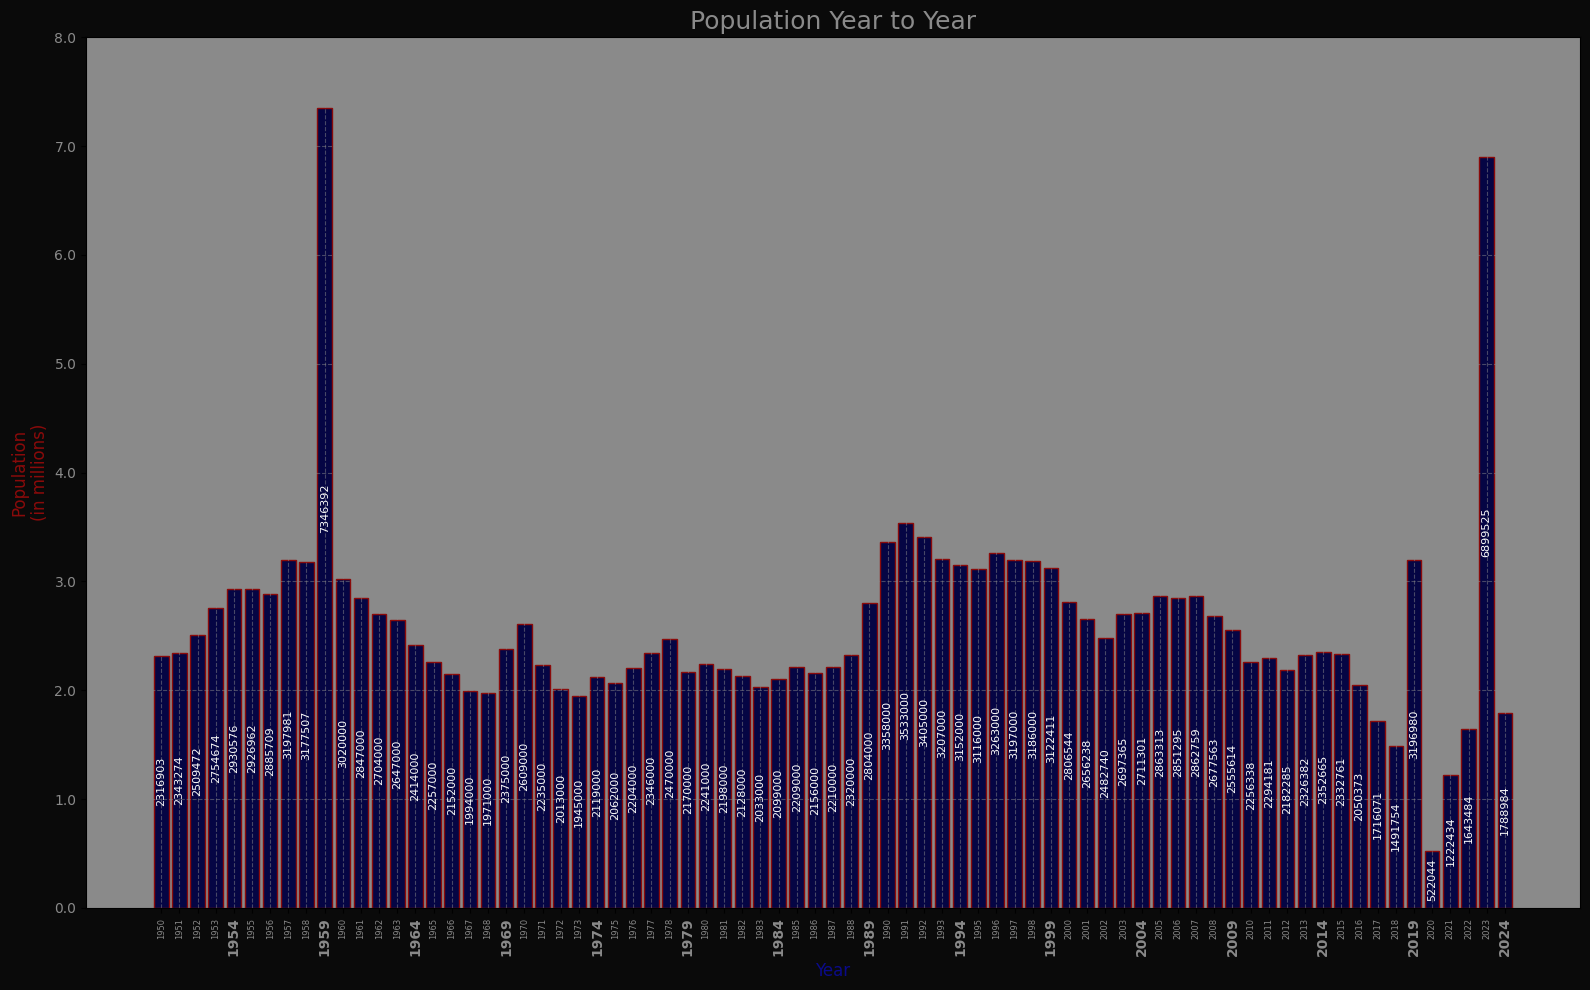

In [24]:
new_vals = np.diff(values)
new_yrs = years[1:]

figure, ax2 = plt.subplots(figsize=(16,10))
figure.set_facecolor(color=pallette['black'])
ax2.set_facecolor(color=pallette['gray'])

bars = ax2.bar(new_yrs, -new_vals, color=pallette['dark_blue'], edgecolor=pallette['red'])

for bar, value in zip(bars, -new_vals):
    ax2.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f"{int(value)}",
        ha='center',
        va='center',
        color=pallette['white'],
        fontsize=8,
        rotation=90
    )

ax2.set_title('Population Year to Year', fontsize=18, color=pallette['gray'])
ax2.set_xlabel('Year', fontsize=12, color=pallette['blue'])
ax2.set_ylabel('Population\n(in millions)',  fontsize=12, color=pallette['red'])

y_ticks = ax2.get_yticks()
ax2.set_xticks(new_yrs)
ax2.set_yticks(y_ticks)

for i, label in enumerate(ax2.get_xticklabels()):
    label.set_rotation(90)
    label.set_color(pallette['gray'])
    if i % 5 == 0:
        label.set_fontsize(10)
        label.set_fontweight('bold')
    else:
        label.set_fontsize(6)

ax2.set_xticklabels([str(year) for year in new_yrs], color=pallette['gray'])
ax2.set_yticklabels([f"{int(np.abs(y))/1000000}" for y in y_ticks], color=pallette['gray'])

ax2.grid(True, linestyle= '--', color=pallette['gray'], alpha=0.5)
plt.tight_layout()